In [99]:
import numpy as np
import pandas as pd


In [100]:
##Importação dos dados de treino

In [101]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_24936\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_24936\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_24936\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [102]:
##Remoção de valores nulos

In [103]:
fd001_train = fd001_train.dropna()
fd001_test = fd001_test.dropna()

In [104]:
##Introdução do cabeçalho do data frame

In [105]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [106]:
##Geração de Histogramas e seleção de variáveis

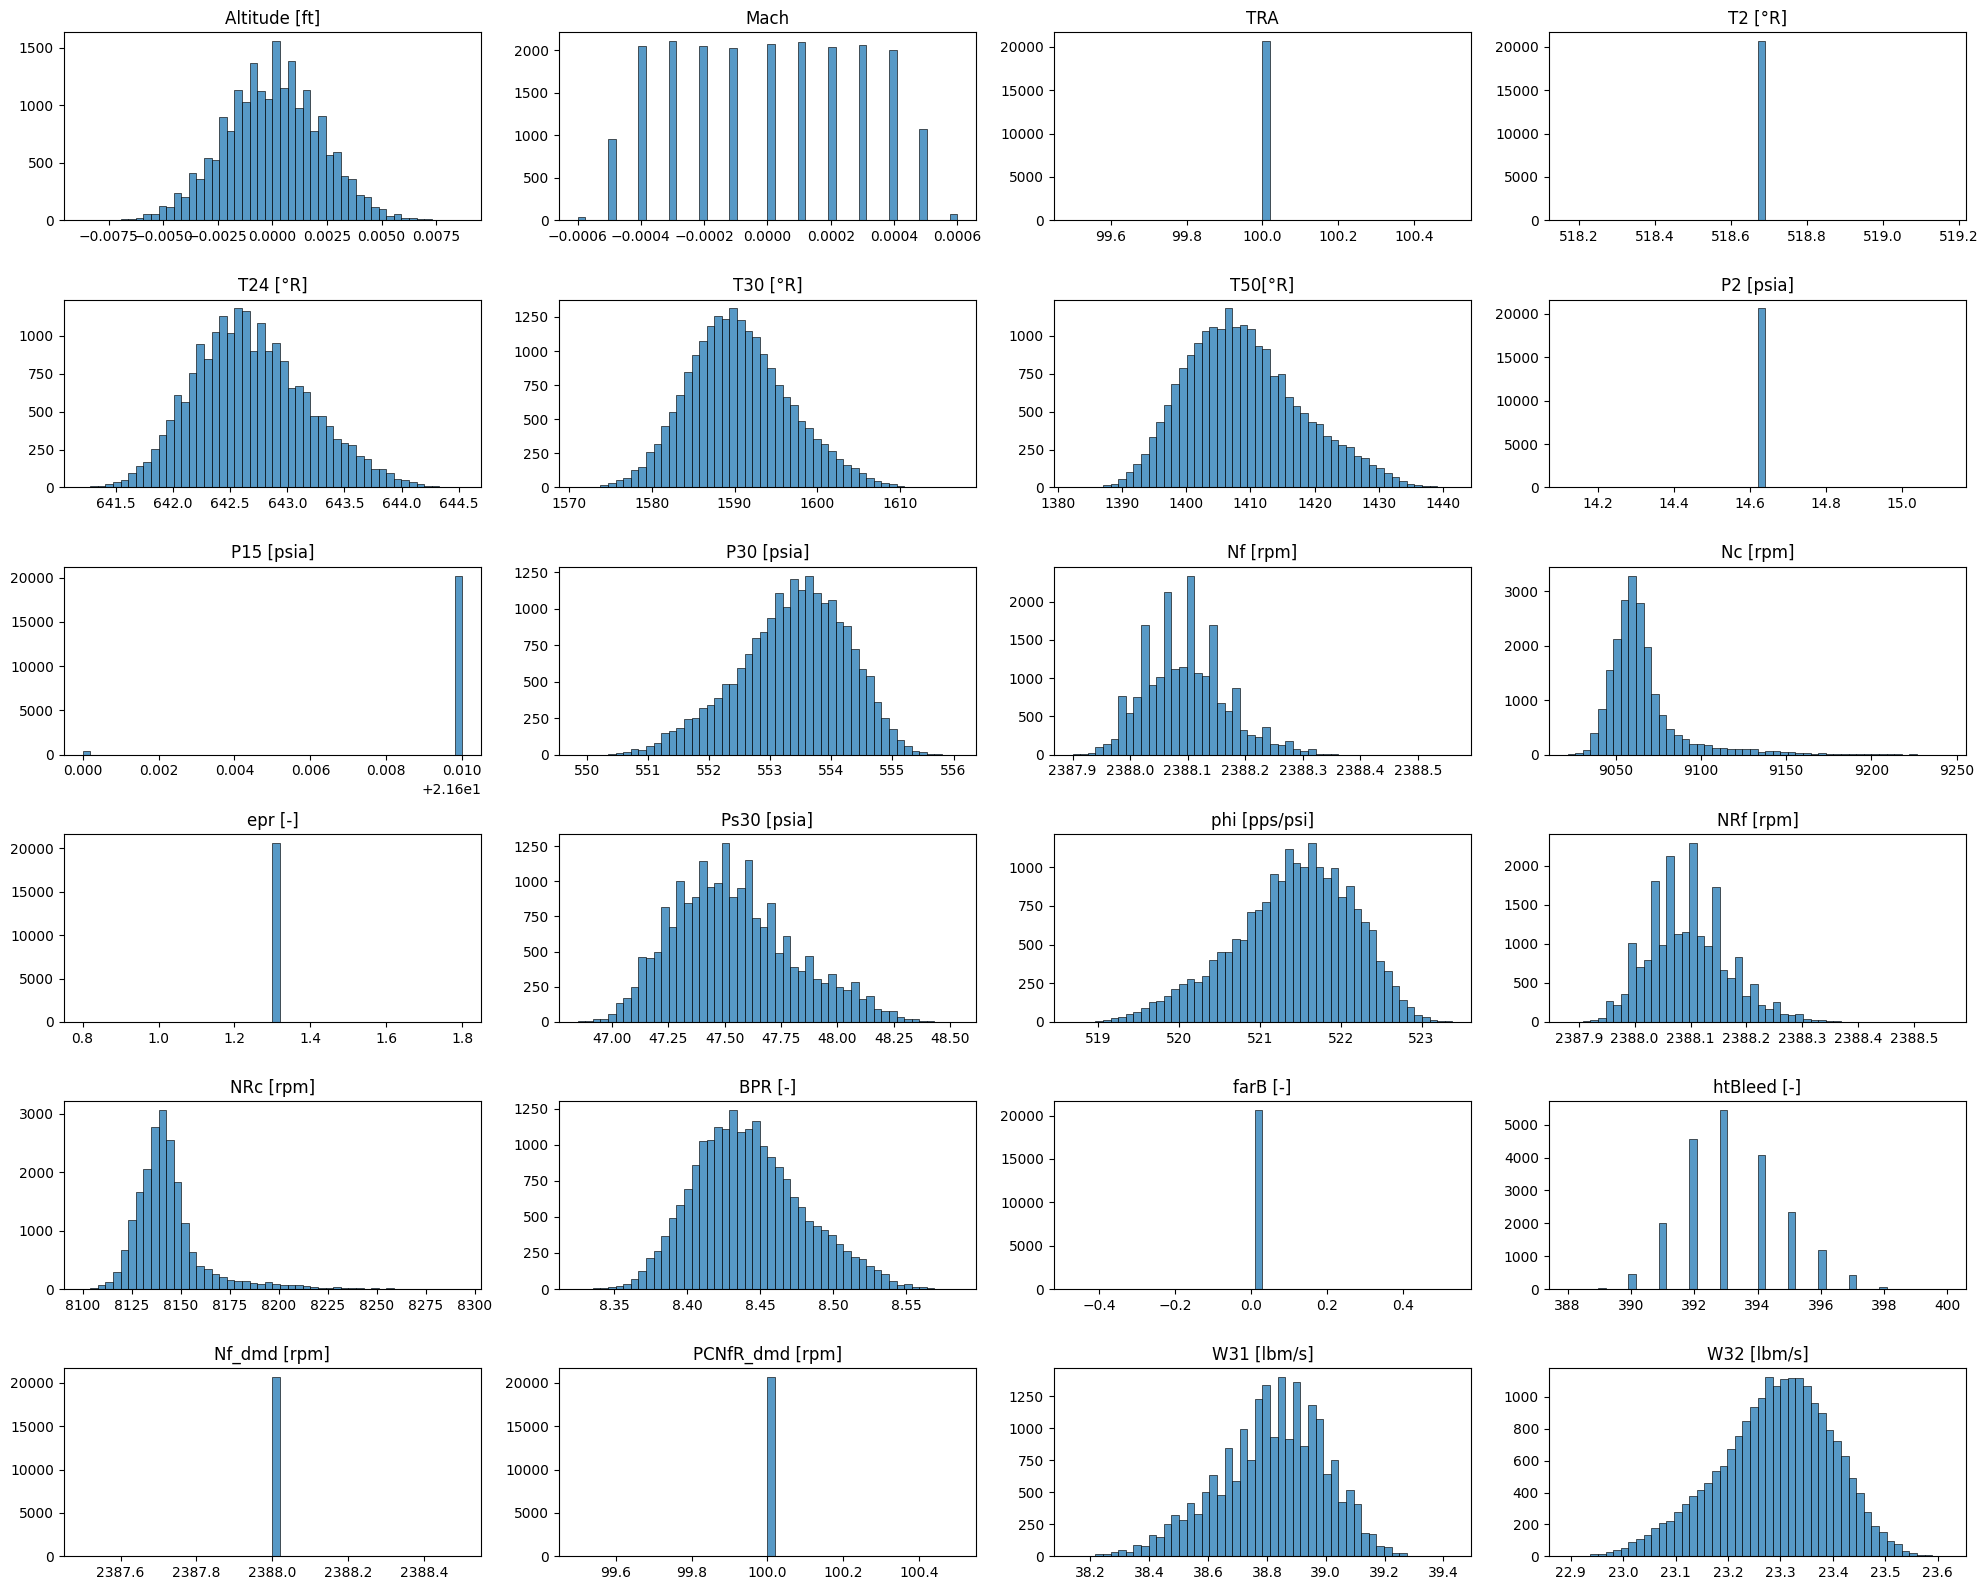

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [108]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]' ,'epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [109]:
##Normalização 

In [110]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [111]:
##Definição dos targets para regressão nos dados de treino

In [112]:
limit_r = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit_r:
            aux.append(limit_r)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [113]:
##Visualização de um ciclo de vida de um motor 

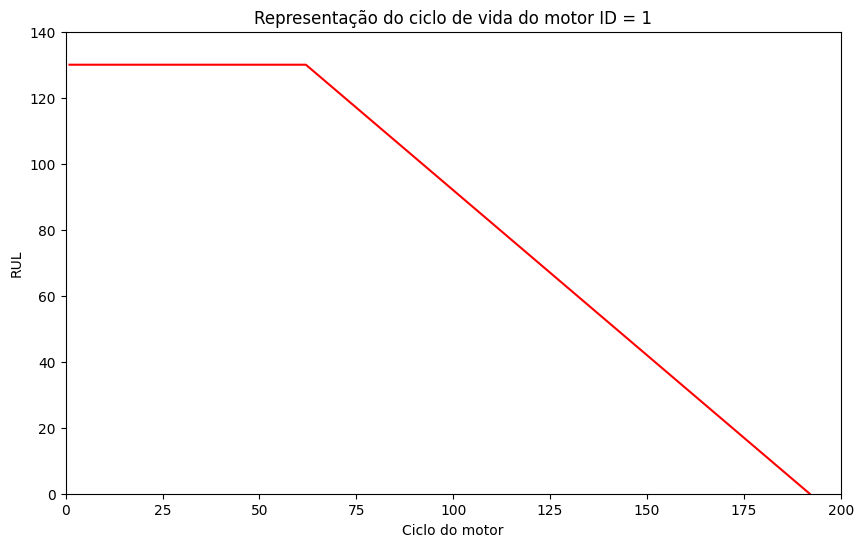

In [114]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [115]:
##Definição dos targets para regressão nos dados de teste 

In [116]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit_r:
            rul_test.append(limit_r)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [117]:
##Criação das janelas de tempo para dados de treino e de teste

In [118]:
def time_window(data,rul,window_size,step):
    x,y_r,y_c = [], [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y_r.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y_r)
window_size = 30
step = 1
x_train, y_train_r= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train_r.shape)  

x_test, y_test_r= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test_r.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [119]:
##Separação das variáveis de treino e teste

In [120]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train_r,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [121]:
##Criação do modelo LSTM

In [122]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm_r=hp.Int('layers_lstm_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(LSTM(hp.Choice('lstm_r_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_lstm_r):
        return_seq = i <n_layers_lstm_r -1
        model.add(LSTM(hp.Choice(f'lstm_r_{i}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Choice(f'dense_r_{i+1}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models(num_models=1)[0]
best_trial=tuner_lstm.oracle.get_best_trials(num_trials=1)[0]
best_param_lstm=best_trial.hyperparameters.get_config()['values']
for p,v in best_param_lstm.items():
    print(f'{p:15s} -> {v}')



Trial 10 Complete [00h 13m 44s]
val_loss: 1894.6058349609375

Best val_loss So Far: 224.7065887451172
Total elapsed time: 01h 39m 16s
layers_lstm_r   -> 4
layers_dense_r  -> 1
lstm_r_0        -> 64
dropout_0       -> 0.2
dense_r_1       -> 64
learning_rate_r -> 0.001
lstm_r_1        -> 32
dropout_1       -> 0.2
lstm_r_2        -> 32
dropout_2       -> 0.2
lstm_r_3        -> 32
dropout_3       -> 0.2


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 21 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [123]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 269.2919 - mean_absolute_error: 12.3514 - mean_squared_error: 269.2919

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - loss: 256.3592 - mean_absolute_error: 12.0049 - mean_squared_error: 256.3592 - val_loss: 185.3868 - val_mean_absolute_error: 10.1388 - val_mean_squared_error: 185.3868
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 244.7789 - mean_absolute_error: 11.6751 - mean_squared_error: 244.7789

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - loss: 246.9911 - mean_absolute_error: 11.7354 - mean_squared_error: 246.9911 - val_loss: 180.0614 - val_mean_absolute_error: 9.8570 - val_mean_squared_error: 180.0614
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 248.1371 - mean_absolute_error: 11.7244 - mean_squared_error: 248.1371

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 243.4936 - mean_absolute_error: 11.6406 - mean_squared_error: 243.4936 - val_loss: 176.6421 - val_mean_absolute_error: 9.7792 - val_mean_squared_error: 176.6421
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 243.1166 - mean_absolute_error: 11.5428 - mean_squared_error: 243.1166

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 242.7430 - mean_absolute_error: 11.5887 - mean_squared_error: 242.7430 - val_loss: 185.2942 - val_mean_absolute_error: 9.9185 - val_mean_squared_error: 185.2942
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 236.1215 - mean_absolute_error: 11.4270 - mean_squared_error: 236.1215

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - loss: 235.1479 - mean_absolute_error: 11.4392 - mean_squared_error: 235.1479 - val_loss: 207.0377 - val_mean_absolute_error: 11.2150 - val_mean_squared_error: 207.0377
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 238.0473 - mean_absolute_error: 11.5740 - mean_squared_error: 238.0473

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 240.8723 - mean_absolute_error: 11.5537 - mean_squared_error: 240.8723 - val_loss: 178.5685 - val_mean_absolute_error: 9.5566 - val_mean_squared_error: 178.5685


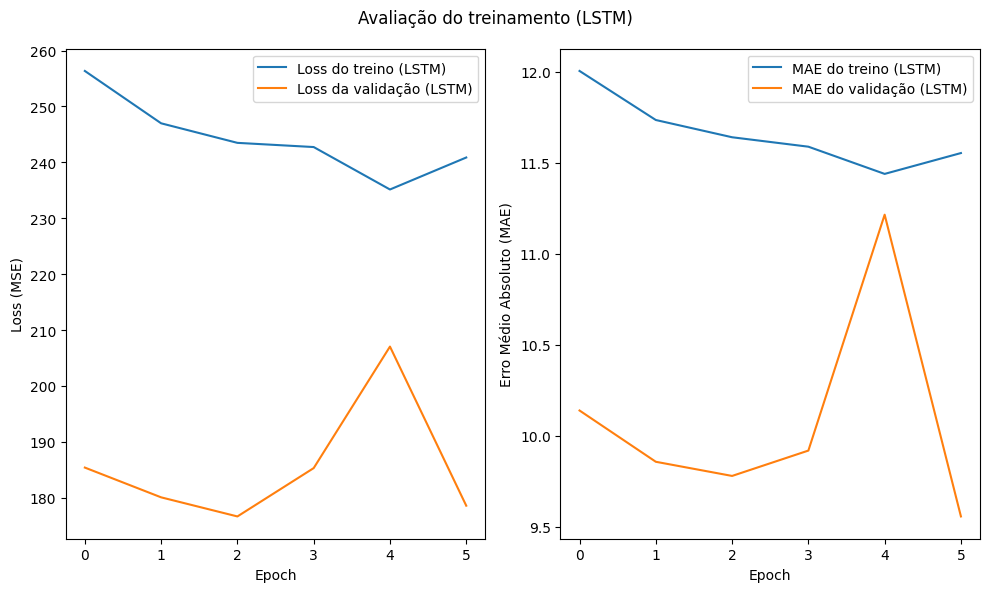

In [124]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('lstm_model_r.h5', monitor='val_loss')
history_lstm=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=50,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [125]:
##Testando o modelo com os dados de teste 

In [126]:
rul_prev_r = best_model_lstm.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [127]:
##Avaliando o modelo

226.32639604038926
15.04
0.11939707192390787
10.749743710316224
0.7714649700109043
Tempo de 6040.509430646896s


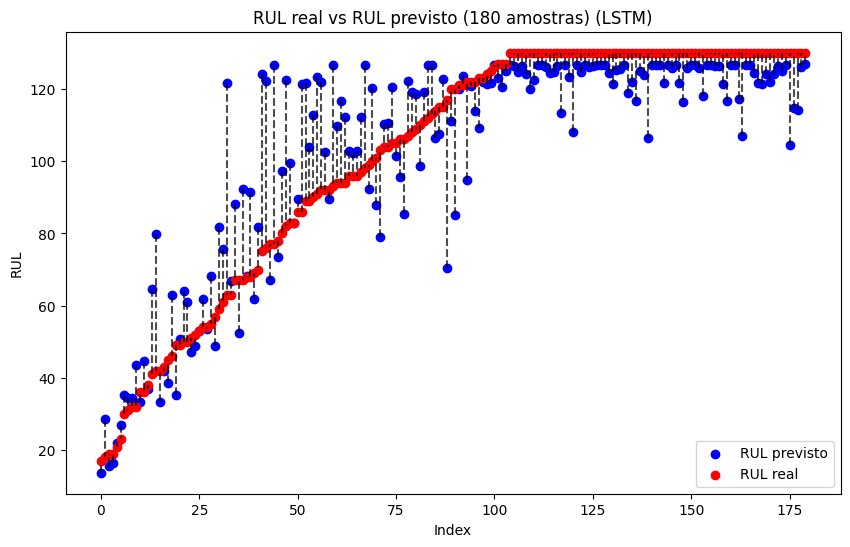

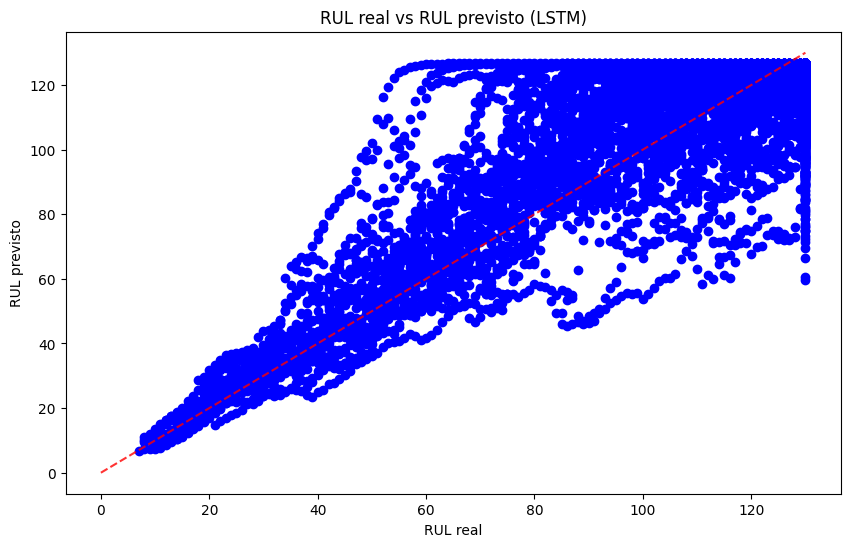

In [128]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [129]:
##Criando modelo BiLSTM

In [130]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi_r=hp.Int('layers_bi_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(Bidirectional(LSTM(hp.Choice('bi_r_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_bi_r):
        return_seq = i <n_layers_bi_r -1
        model.add(Bidirectional(LSTM(hp.Choice(f'bi_r_{i}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Choice(f'dense_r_{i+1}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_regression',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models(num_models=1)[0]
best_trial=tuner_bilstm.oracle.get_best_trials(num_trials=1)[0]
best_param_bi = best_trial.hyperparameters.get_config()['values']
for p,v in best_param_bi.items():
    print(f'{p:15s} -> {v}')


Trial 10 Complete [00h 05m 54s]
val_loss: 228.68606567382812

Best val_loss So Far: 191.86546325683594
Total elapsed time: 01h 39m 33s
layers_bi_r     -> 2
layers_dense_r  -> 1
bi_r_0          -> 64
dropout_0       -> 0.30000000000000004
dense_r_1       -> 128
learning_rate_r -> 0.001
bi_r_1          -> 64
dropout_1       -> 0.30000000000000004
bi_r_2          -> 32
dropout_2       -> 0.30000000000000004
dense_r_2       -> 256
dense_r_3       -> 128


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [131]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - loss: 255.4017 - mean_absolute_error: 11.8399 - mean_squared_error: 255.4017

71/71 ━━━━━━━━━━━━━━━━━━━━ 62s 689ms/step - loss: 236.7692 - mean_absolute_error: 11.4323 - mean_squared_error: 236.7692 - val_loss: 177.8026 - val_mean_absolute_error: 9.9227 - val_mean_squared_error: 177.8026
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - loss: 226.0506 - mean_absolute_error: 11.2485 - mean_squared_error: 226.0506

71/71 ━━━━━━━━━━━━━━━━━━━━ 46s 653ms/step - loss: 229.5296 - mean_absolute_error: 11.3586 - mean_squared_error: 229.5296 - val_loss: 176.0962 - val_mean_absolute_error: 9.6490 - val_mean_squared_error: 176.0962
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - loss: 219.1148 - mean_absolute_error: 11.0317 - mean_squared_error: 219.1148

71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 649ms/step - loss: 222.6099 - mean_absolute_error: 11.1557 - mean_squared_error: 222.6099 - val_loss: 184.2244 - val_mean_absolute_error: 10.1910 - val_mean_squared_error: 184.2244
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - loss: 229.8392 - mean_absolute_error: 11.2978 - mean_squared_error: 229.8392

71/71 ━━━━━━━━━━━━━━━━━━━━ 46s 654ms/step - loss: 222.8033 - mean_absolute_error: 11.1278 - mean_squared_error: 222.8033 - val_loss: 184.8824 - val_mean_absolute_error: 9.8998 - val_mean_squared_error: 184.8824
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - loss: 227.0645 - mean_absolute_error: 11.2711 - mean_squared_error: 227.0645

71/71 ━━━━━━━━━━━━━━━━━━━━ 47s 666ms/step - loss: 220.2152 - mean_absolute_error: 11.0544 - mean_squared_error: 220.2152 - val_loss: 172.9958 - val_mean_absolute_error: 9.6514 - val_mean_squared_error: 172.9958
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - loss: 214.7134 - mean_absolute_error: 10.9054 - mean_squared_error: 214.7134

71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 693ms/step - loss: 216.6958 - mean_absolute_error: 10.9378 - mean_squared_error: 216.6958 - val_loss: 180.1100 - val_mean_absolute_error: 9.8743 - val_mean_squared_error: 180.1101
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - loss: 216.9658 - mean_absolute_error: 10.9681 - mean_squared_error: 216.9658

71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 679ms/step - loss: 215.6934 - mean_absolute_error: 10.8875 - mean_squared_error: 215.6934 - val_loss: 181.2656 - val_mean_absolute_error: 10.2303 - val_mean_squared_error: 181.2656
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - loss: 215.2760 - mean_absolute_error: 10.9375 - mean_squared_error: 215.2760

71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 694ms/step - loss: 211.6364 - mean_absolute_error: 10.7961 - mean_squared_error: 211.6364 - val_loss: 199.8893 - val_mean_absolute_error: 10.5552 - val_mean_squared_error: 199.8893


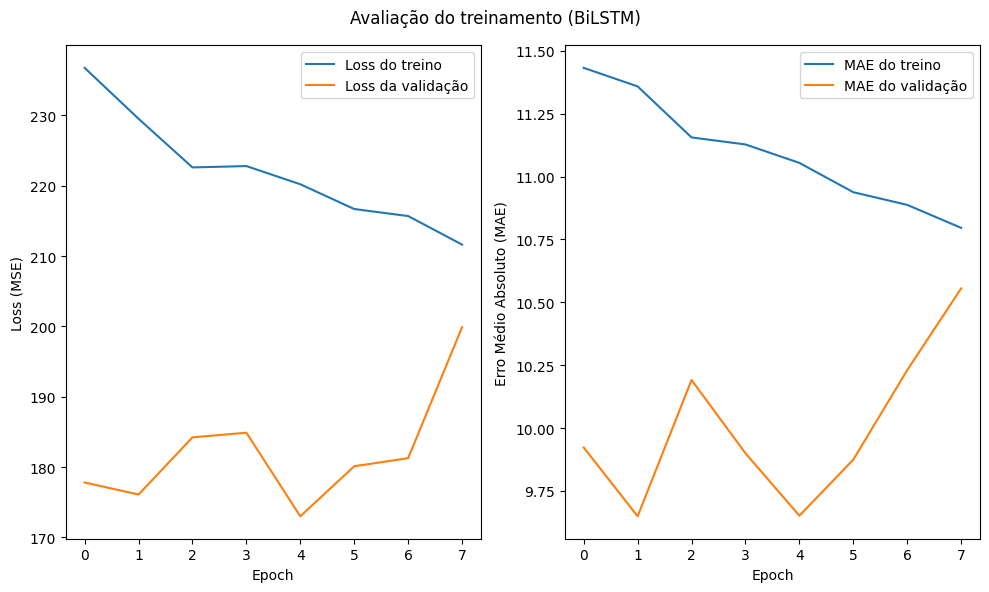

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('bi_model_r.h5', monitor='val_loss')
history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=50,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [133]:
##Testando o modelo com os dados de teste

In [134]:
rul_prev_r = best_model_bi.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step


In [135]:
##Avaliando o modelo

265.7530581786646
16.30
0.12663280733953158
12.334660863633154
0.7316535579450631
Tempo de 6429.812949895859s


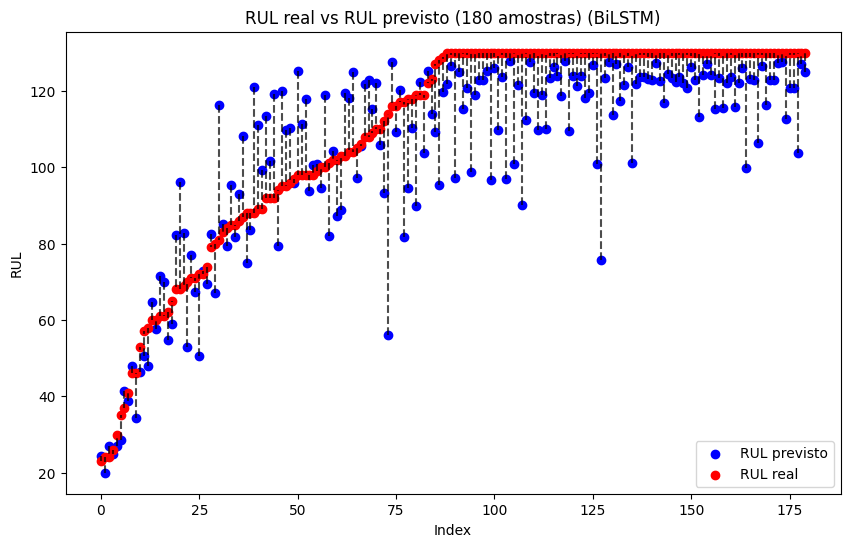

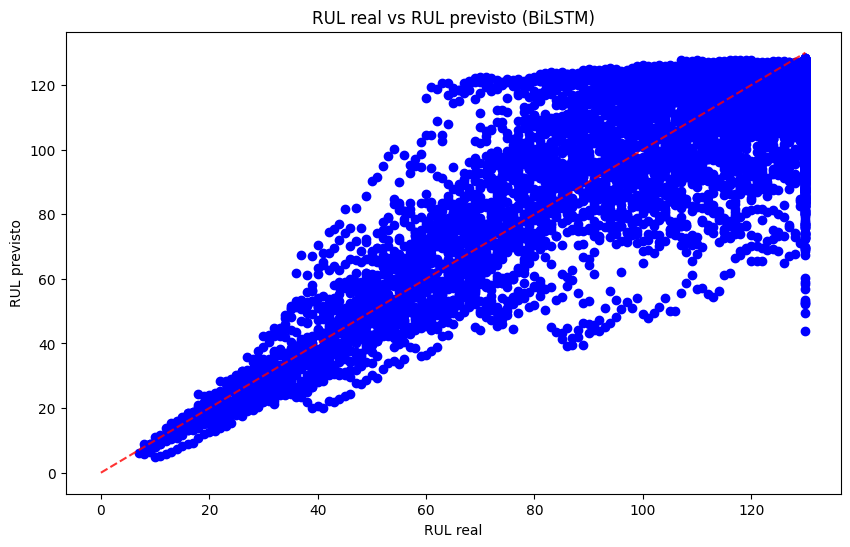

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()